In [64]:
import os
import boto3
import pandas as pd
import jupyter_black
from io import BytesIO
from io import StringIO
from tqdm.notebook import tqdm
import altair as alt

In [11]:
jupyter_black.load()
pd.options.display.max_columns = 100
pd.options.display.max_rows = 1000
pd.options.display.max_colwidth = None

In [54]:
import requests

headers = {
    "sec-ch-ua": '"Chromium";v="124", "Google Chrome";v="124", "Not-A.Brand";v="99"',
    "Accept": "*/*",
    "Referer": "https://baseballsavant.mlb.com/statcast_search?hfPT=&hfAB=single%7Cdouble%7Ctriple%7Chome%5C.%5C.run%7C&hfGT=R%7C&hfPR=&hfZ=&hfStadium=22%7C&hfBBL=&hfNewZones=&hfPull=&hfC=&hfSea=2024%7C&hfSit=&player_type=batter&hfOuts=&hfOpponent=&pitcher_throws=&batter_stands=&hfSA=&game_date_gt=&game_date_lt=&hfMo=&hfTeam=&home_road=&hfRO=&position=&hfInfield=&hfOutfield=&hfInn=&hfBBT=&batters_lookup%5B%5D=660271&hfFlag=&metric_1=&group_by=name&min_pitches=0&min_results=0&min_pas=0&sort_col=pitches&player_event_sort=api_p_release_speed&sort_order=desc",
    "X-Requested-With": "XMLHttpRequest",
    "sec-ch-ua-mobile": "?0",
    "User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/124.0.0.0 Safari/537.36",
    "sec-ch-ua-platform": '"macOS"',
}

params = {
    "warehouse": "true",
    "hfPT": "",
    "hfAB": "single|double|triple|home\\.\\.run|",
    "hfGT": "R|",
    "hfPR": "",
    "hfZ": "",
    "hfStadium": "22|",
    "hfBBL": "",
    "hfNewZones": "",
    "hfPull": "",
    "hfC": "",
    "hfSea": "2024|",
    "hfSit": "",
    "player_type": "batter",
    "batters_lookup[]": "660271",
    "hfFlag": "",
    "metric_1": "",
    "group_by": "name",
    "min_pitches": "0",
    "min_results": "0",
    "min_pas": "0",
    "sort_col": "pitches",
    "player_event_sort": "api_p_release_speed",
    "sort_order": "desc",
    "type": "details",
    "player_id": "660271",
    "minors": "false",
}

json_data = requests.get(
    "https://baseballsavant.mlb.com/player/spray", params=params, headers=headers
).json()

In [55]:
src = pd.DataFrame(json_data)

In [56]:
events = ["single", "double", "triple", "home_run"]

In [57]:
src.iloc[0]

player_id                                                                                               660271
batter_name                                                                                     Ohtani, Shohei
pitcher_name                                                                                   Hughes, Brandon
batter                                                                                                  660271
pitcher                                                                                                 676714
venue                                                                                           Dodger Stadium
team_batting                                                                                               LAD
team_pitching                                                                                               AZ
pitch_type                                                                                                  SL
g

In [62]:
df = src.query(f"events == 'home_run'")[
    ["pitcher_name", "hc_y", "hc_x", "distance_projected", "game_date", "events"]
]

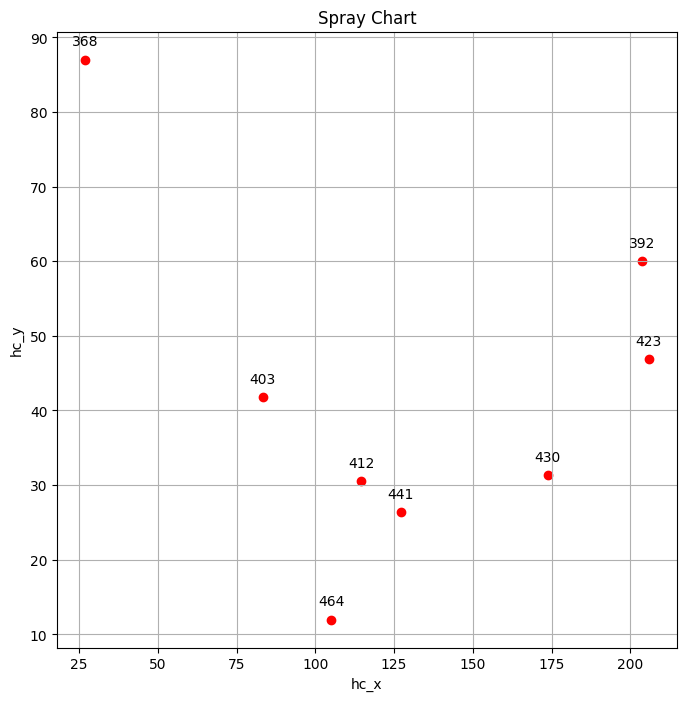

In [71]:
import matplotlib.pyplot as plt

# Example data for spray chart
sprayData = [
    {
        "hc_x": 26.96,
        "hc_y": 87.01,
        "distance_projected": 368,
        "game_date": "2024-05-17",
        "events": "home_run",
    },
    {
        "hc_x": 127.18,
        "hc_y": 26.36,
        "distance_projected": 441,
        "game_date": "2024-05-06",
        "events": "home_run",
    },
    {
        "hc_x": 114.5,
        "hc_y": 30.59,
        "distance_projected": 412,
        "game_date": "2024-05-05",
        "events": "home_run",
    },
    {
        "hc_x": 104.99,
        "hc_y": 11.98,
        "distance_projected": 464,
        "game_date": "2024-05-05",
        "events": "home_run",
    },
    {
        "hc_x": 203.7,
        "hc_y": 59.98,
        "distance_projected": 392,
        "game_date": "2024-05-04",
        "events": "home_run",
    },
    {
        "hc_x": 205.86,
        "hc_y": 46.92,
        "distance_projected": 423,
        "game_date": "2024-04-21",
        "events": "home_run",
    },
    {
        "hc_x": 83.26,
        "hc_y": 41.81,
        "distance_projected": 403,
        "game_date": "2024-04-12",
        "events": "home_run",
    },
    {
        "hc_x": 173.7,
        "hc_y": 31.3,
        "distance_projected": 430,
        "game_date": "2024-04-03",
        "events": "home_run",
    },
]

# Extracting x and y coordinates and labels
x_coords = [d["hc_x"] for d in sprayData]
y_coords = [d["hc_y"] for d in sprayData]
labels = [d["distance_projected"] for d in sprayData]

# Plotting the points on a simple grid
plt.figure(figsize=(8, 8))
plt.scatter(x_coords, y_coords, c="red")
for i, txt in enumerate(labels):
    plt.annotate(
        txt,
        (x_coords[i], y_coords[i]),
        textcoords="offset points",
        xytext=(0, 10),
        ha="center",
    )
plt.xlabel("hc_x")
plt.ylabel("hc_y")
plt.title("Spray Chart")
plt.grid(True)
plt.show()

In [ ]:
src.query(f"events == 'home_run'")[
    ["pitcher_name", "hc_y", "hc_x", "distance_projected", "game_date", "events"]
].to_dict(orient="records")

[{'pitcher_name': 'Montas, Frankie',
  'hc_y': 87.01,
  'hc_x': 26.96,
  'distance_projected': 368,
  'game_date': '2024-05-17',
  'events': 'home_run'},
 {'pitcher_name': 'Muñoz, Roddery',
  'hc_y': 26.36,
  'hc_x': 127.18,
  'distance_projected': 441,
  'game_date': '2024-05-06',
  'events': 'home_run'},
 {'pitcher_name': 'Fried, Max',
  'hc_y': 30.59,
  'hc_x': 114.5,
  'distance_projected': 412,
  'game_date': '2024-05-05',
  'events': 'home_run'},
 {'pitcher_name': 'Minter, A.J.',
  'hc_y': 11.98,
  'hc_x': 104.99,
  'distance_projected': 464,
  'game_date': '2024-05-05',
  'events': 'home_run'},
 {'pitcher_name': 'Elder, Bryce',
  'hc_y': 59.98,
  'hc_x': 203.7,
  'distance_projected': 392,
  'game_date': '2024-05-04',
  'events': 'home_run'},
 {'pitcher_name': 'Houser, Adrian',
  'hc_y': 46.92,
  'hc_x': 205.86,
  'distance_projected': 423,
  'game_date': '2024-04-21',
  'events': 'home_run'},
 {'pitcher_name': 'King, Michael',
  'hc_y': 41.81,
  'hc_x': 83.26,
  'distance_proje